In [3]:
import numpy as np
import matplotlib.pyplot as plt
# input file
#filename="RR_Lyr-2008.dat"
#filename="RR_Lyr-2009.dat"
#filename="RR_Lyr-2010.dat"
#filename="RR_Lyr-2011.dat"
#filename="RR_Lyr-2012.dat"
#filename="RR_Lyr-2013.dat"
filename="RR_Lyr-2014.dat"
#filename="RR_Lyr-2015.dat"
#filename="RR_Lyr-2016.dat"
#filename="RR_Lyr-2017.dat"
#filename="RR_Lyr-2018.dat"
#filename="RR_Lyr-2019.dat"
#filename="RR_Lyr-2020.dat"
#filename="RR_Lyr-2021.dat"
#filename="RR_Lyr-2022.dat"
#filename="RR_Lyr-2023.dat"
#filename="RR_Lyr-2024.dat"

# Cycle numbers
#E1= [-8000,-7750]  # 2008
#E1= [-7600,-7000]  # 2009
#E1= [-6850,-6400]  # 2010
#E1= [-6300,-5700]  # 2011
#E1= [-5650,-5100]  # 2012
#E1= [-4900,-4450]  # 2013
E1= [-4380,-3800]  # 2014
#E1= [-3650,-3100]  # 2015
#E1= [-3000,-2560]  # 2016
#E1= [-2350,-1900]  # 2017
#E1= [-1750,-1180]  # 2018
#E1= [-1180,-680]   # 2019
#E1= [-600,80]      # 2020
#E1= [60,700]       # 2021
#E1= [830,1300]     # 2022
#E1= [1400,2000]    # 2023
#E1= [2000,2500]    # 2024


In [4]:
# Initial elements
JD0=2459175.409 
P = 0.566773
print ("\nInitial elements: {:.4f} + {:.8f} E".format(JD0,P))


Initial elements: 2459175.4090 + 0.56677300 E


In [5]:

# Read file
print("Read ",filename)
dta = []
dta = np.loadtxt(filename, comments='#')
JD=dta[:,0]
err=dta[:,1]
OC=dta[:,2]
E=dta[:,3]
print("Number of ToM:", len(dta))

Read  RR_Lyr-2014.dat
Number of ToM: 71


In [6]:

# Linear fit
n = 1  # degree of polynomial
p, C_p = np.polyfit(E, OC, n, cov=True)  # C_p is estimated covariance matrix  


In [7]:

# New elements
JD0 = JD0+p[1]
P0= P+p[0]
dJD0 = np.sqrt(np.diag(C_p))[1]
dP0= np.sqrt(np.diag(C_p))[0]
print("\nNew elements: {:.4f} + {:.8f} E ".format(JD0,P0))
print("                  ± {:.4f} ± {:.8f}  ".format(dJD0,dP0))
print("\nCovariance matrix: ")
print(C_p)



New elements: 2459175.4259 + 0.56677729 E 
                  ± 0.0110 ± 0.00000268  

Covariance matrix: 
[[7.18011362e-12 2.94150041e-08]
 [2.94150041e-08 1.20635615e-04]]


In [8]:

# Do the interpolation for plotting:
t = np.linspace(E1[0], E1[1], 500) 

TT = np.vstack([t**(n-i) for i in range(n+1)]).T
yi = np.dot(TT, p)  # matrix multiplication calculates the polynomial values
C_yi = np.dot(TT, np.dot(C_p, TT.T))
sig_yi = np.sqrt(np.diag(C_yi))  # Standard deviations are sqrt of diagonal


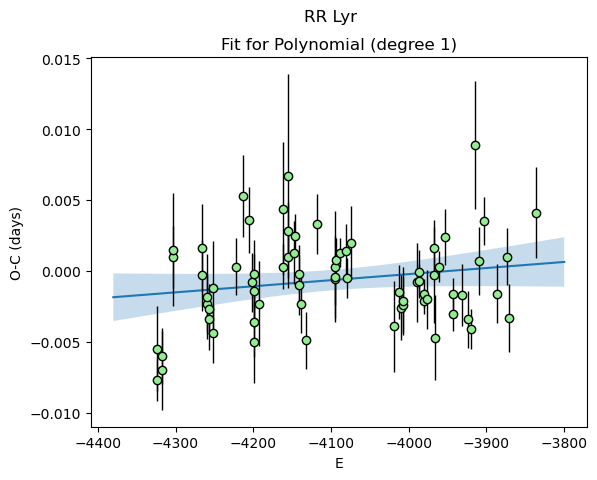

In [9]:

# Do the plotting:
# First plot: fitted line on original data
fg, ax = plt.subplots(1, 1)
ax.set_title("Fit for Polynomial (degree {})".format(n))
ax.fill_between(t, yi+2*sig_yi, yi-2*sig_yi, alpha=.25)
ax.plot(t, yi,'-')
ax.errorbar(E, OC, yerr=err, color="lightgreen", fillstyle="full", fmt='o', ecolor="black", elinewidth=1, mec="black")
ax.set_xlabel("E")
ax.set_ylabel("O-C (days)")
ax.axis('tight')
plt.suptitle("RR Lyr")
fg.canvas.draw()
plt.show()


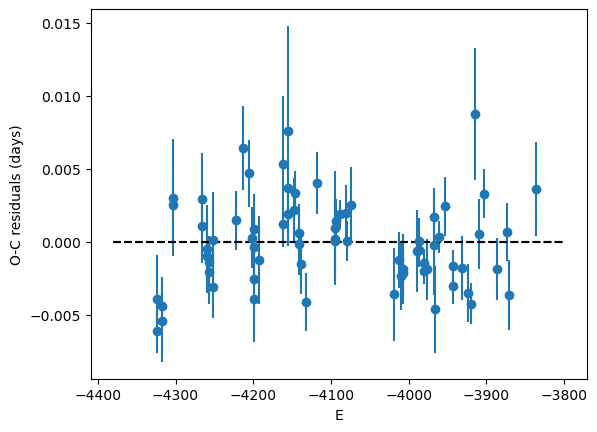

In [10]:
# Second plot: residuals
plt.errorbar(E, OC-np.polyval(p, E), xerr=0, yerr=err, fmt='o')
plt.xlabel("E")
plt.ylabel("O-C residuals (days)")
x = [E1[0], E1[1]] 
y = [0,0] 
plt.plot(x,y, '--k', x, y, '--k')
fg.canvas.draw()
plt.show()